In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.stats import bootstrap

In [190]:
## Functions. put this in a separate file later. 
def hdf5_to_dict(path): 
    _dict = {}
    with h5py.File(path) as HDF5_file:
        for key in HDF5_file.keys():
            _dict[key] = np.array(HDF5_file[key])
    return _dict

<b>Load data</b>

In [191]:
path = 'C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/St52/'
cluster_file = 'SMP_x240716_1_s4.h5'

data = hdf5_to_dict(path + cluster_file)

<b>Group clusters based on IGOr processes</b>

In [192]:
cluster_allocations = data['Cluster_Allocations0']
cluster_means = data['Cluster_Means0']
average_traces = data['Averages0']
raw_traces = data['Snippets0']
time = data['SnippetsTimes0']
time = time[:,:,:]-time[0,:,:]

<b>Plot things</b>

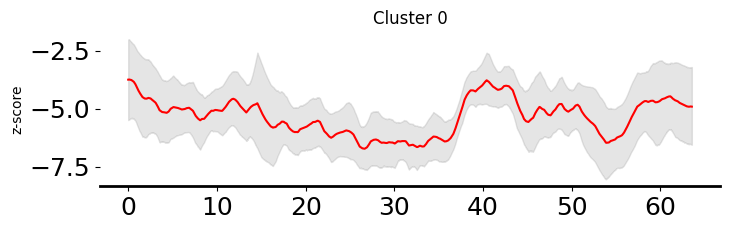

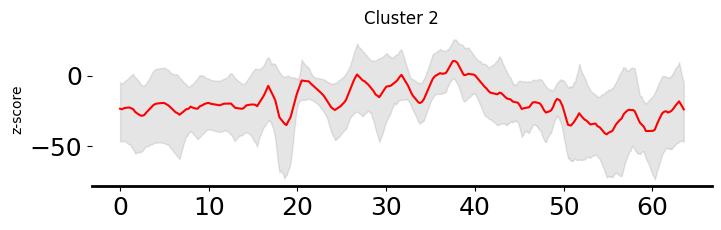

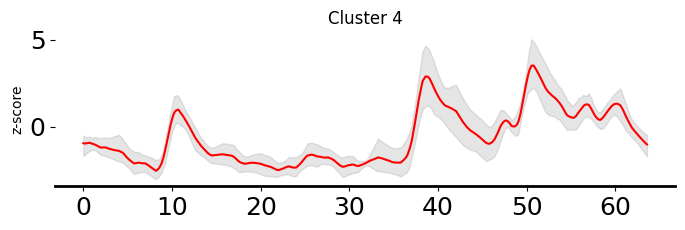

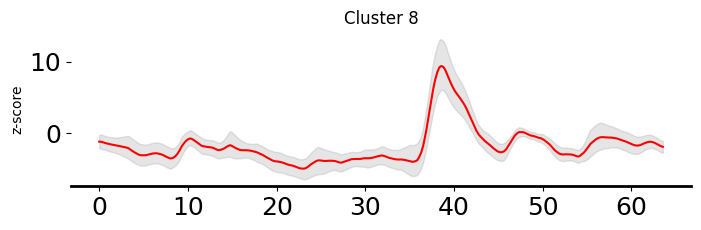

In [244]:
clusters_to_plot = [0, 2, 4, 8]
for cur_cluster in clusters_to_plot:   
    fig, ax = plt.subplots(figsize = (8, 2))
    cluster_locs = np.where(cluster_allocations == cur_cluster)[0]
    #ax.plot(average_traces[:,cluster_locs], color = 'grey', alpha=0.5)
    cur_traces = []
    for i in cluster_locs:
       cur_traces.append(np.vstack(raw_traces[:,:,i]))
    
    stacked_traces = (np.hstack(cur_traces).transpose(),)
    boot_CI = bootstrap(stacked_traces, np.mean, confidence_level = 0.95, random_state=1, method='percentile')
    ax.fill_between(time[:,1,i], boot_CI.confidence_interval.low, boot_CI.confidence_interval.high, color='grey', alpha=0.2)
    ax.plot(time[:,1,i], cluster_means[:-1,cur_cluster], color = 'red')
    ax.set_title('Cluster {}'.format(cur_cluster))
    ax.set_ylabel('z-score')
    axe = plt.gca()  # Get the current axis
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)

    # Optionally, you can also adjust the bottom and left axis
    axe.spines['left'].set_visible(False)
    axe.spines['bottom'].set_visible(True)
    axe = plt.gca()  # Get the current axis

    axe.spines['left'].set_linewidth(2)
    axe.spines['bottom'].set_linewidth(2)
    axe.spines['bottom'].set_linewidth(2) 
    axe.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig('SMP_x240716_1_s4_cluster_{}.svg'.format(cur_cluster), format='svg', transparent=True)





In [233]:
boot_CI = bootstrap(stacked_traces, np.mean, confidence_level = 0.95, random_state=1, method='percentile')

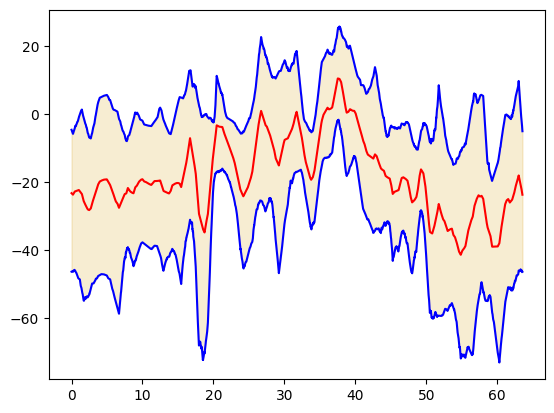

In [243]:

#plt.plot(np.hstack(stacked_traces).transpose(), color='grey')
plt.plot(time[:,1,i], cluster_means[:-1,cur_cluster], color='red')
#plt.plot(cluster_means[:-1,cur_cluster]-boot_CI.confidence_interval.low, color='blue')
plt.plot(time[:,1,i], boot_CI.confidence_interval.high, color='blue')
plt.plot(time[:,1,i], boot_CI.confidence_interval.low, color='blue')
plt.fill_between(time[:,1,i], boot_CI.confidence_interval.low, boot_CI.confidence_interval.high, color='goldenrod', alpha=0.2)

In [217]:
boot_CI.confidence_interval.low

array([-2.1271057, -2.1281736, -2.1283512, ..., -2.760416 , -2.7611227,
       -2.7618282], dtype=float32)